**классификатор изображений LeNet**

Евгений Борисов borisov.e@solarl.ru

## Библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D 
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import utils 

In [3]:
np.random.seed(1671)

## Данные

In [4]:
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-images-idx3-ubyte.gz
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-labels-idx1-ubyte.gz
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/t10k-labels-idx1-ubyte.gz
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/t10k-images-idx3-ubyte.gz

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
X_train = train_images/255.0
X_test = test_images/255.0

X_train = X_train[:,:,:,np.newaxis].astype('float32')
X_test = X_test[:,:,:,np.newaxis].astype('float32')

In [8]:
# X_train.shape, train_labels.shape, x_test.shape, test_labels.shape

In [9]:
NB_CLASSES = len(set(train_labels))
NB_CLASSES

10

In [11]:
# convert class vectors to binary class matrices
y_train = utils.to_categorical(train_labels, NB_CLASSES)
y_test = utils.to_categorical(test_labels, NB_CLASSES)

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [13]:
IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
INPUT_SHAPE = (IMG_ROWS,IMG_COLS,1)

## Модель

In [14]:
# initialize the optimizer and model
model = Sequential()
# CONV => RELU => POOL
model.add(Convolution2D(20, kernel_size=5, padding='same', input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(rate=0.7))
# CONV => RELU => POOL
model.add(Convolution2D(50, kernel_size=5, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(rate=0.7))
# Flatten => RELU layers
model.add(Flatten())
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(rate=0.7))
# a softmax classifier
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        520       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0         
__________

In [16]:
# model.compile(loss="categorical_crossentropy", optimizer='rmsprop',metrics=["accuracy"])
model.compile(loss="categorical_crossentropy", optimizer='sgd',metrics=["accuracy"])

## Обучение

In [17]:
# network and training
NB_EPOCH = 100
BATCH_SIZE = 128
VERBOSE = 1
VALIDATION_SPLIT=0.2

In [18]:
%%time

history = model.fit(X_train, y_train, 
                    batch_size=BATCH_SIZE, 
                    epochs=NB_EPOCH, 
                    verbose=VERBOSE, 
                    validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
48000/48000 [==============================] - 28s 584us/sample - loss: 2.1382 - acc: 0.2123 - val_loss: 1.5738 - val_acc: 0.6168
Epoch 2/100
48000/48000 [==============================] - 27s 564us/sample - loss: 1.3311 - acc: 0.5126 - val_loss: 0.9118 - val_acc: 0.7103
Epoch 3/100
48000/48000 [==============================] - 27s 562us/sample - loss: 1.0383 - acc: 0.6162 - val_loss: 0.7869 - val_acc: 0.7300
Epoch 4/100
48000/48000 [==============================] - 27s 560us/sample - loss: 0.9315 - acc: 0.6541 - val_loss: 0.7307 - val_acc: 0.7485
Epoch 5/100
48000/48000 [==============================] - 27s 565us/sample - loss: 0.8628 - acc: 0.6825 - val_loss: 0.6984 - val_acc: 0.7488
Epoch 6/100
48000/48000 [==============================] - 27s 565us/sample - loss: 0.8273 - acc: 0.6933 - val_loss: 0.6783 - val_acc: 0.7573
Epoch 7/100
48000/48000 [=========================

48000/48000 [==============================] - 26s 548us/sample - loss: 0.5346 - acc: 0.7993 - val_loss: 0.4552 - val_acc: 0.8403
Epoch 57/100
48000/48000 [==============================] - 26s 546us/sample - loss: 0.5362 - acc: 0.8007 - val_loss: 0.4608 - val_acc: 0.8403
Epoch 58/100
48000/48000 [==============================] - 26s 546us/sample - loss: 0.5338 - acc: 0.8008 - val_loss: 0.4546 - val_acc: 0.8410
Epoch 59/100
48000/48000 [==============================] - 26s 547us/sample - loss: 0.5329 - acc: 0.8029 - val_loss: 0.4554 - val_acc: 0.8418
Epoch 60/100
48000/48000 [==============================] - 26s 546us/sample - loss: 0.5311 - acc: 0.8035 - val_loss: 0.4490 - val_acc: 0.8446
Epoch 61/100
48000/48000 [==============================] - 27s 560us/sample - loss: 0.5305 - acc: 0.8023 - val_loss: 0.4464 - val_acc: 0.8458
Epoch 62/100
48000/48000 [==============================] - 27s 555us/sample - loss: 0.5319 - acc: 0.8027 - val_loss: 0.4467 - val_acc: 0.8454
Epoch 63/100

## Тестирование

In [19]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 2s 245us/sample - loss: 0.4106 - acc: 0.8548

Test score: 0.41062945518493654
Test accuracy: 0.8548


---

In [20]:
# import matplotlib.pyplot as plt

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

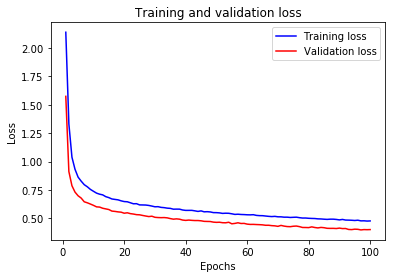

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

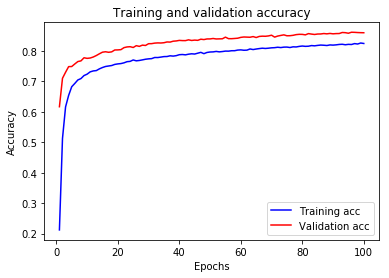

In [23]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

---

In [25]:
# class_names = [ 'T-shirt/top', 
#                 'Trouser', 
#                 'Pullover', 
#                 'Dress', 
#                 'Coat', 
#                 'Sandal', 
#                 'Shirt', 
#                 'Sneaker', 
#                 'Bag', 
#                 'Ankle boot' ]

In [26]:
class_names = [ 'футболка', 
                'брюки', 
                'свитер', 
                'платье', 
                'пальто', 
                'сандали', 
                'рубашка', 
                'тапки', 
                'сумка', 
                'полусапожки' ]

---

In [28]:
p = model.predict(X_test)
r = np.argmax(p,axis=1)
n = test_images.shape[1]

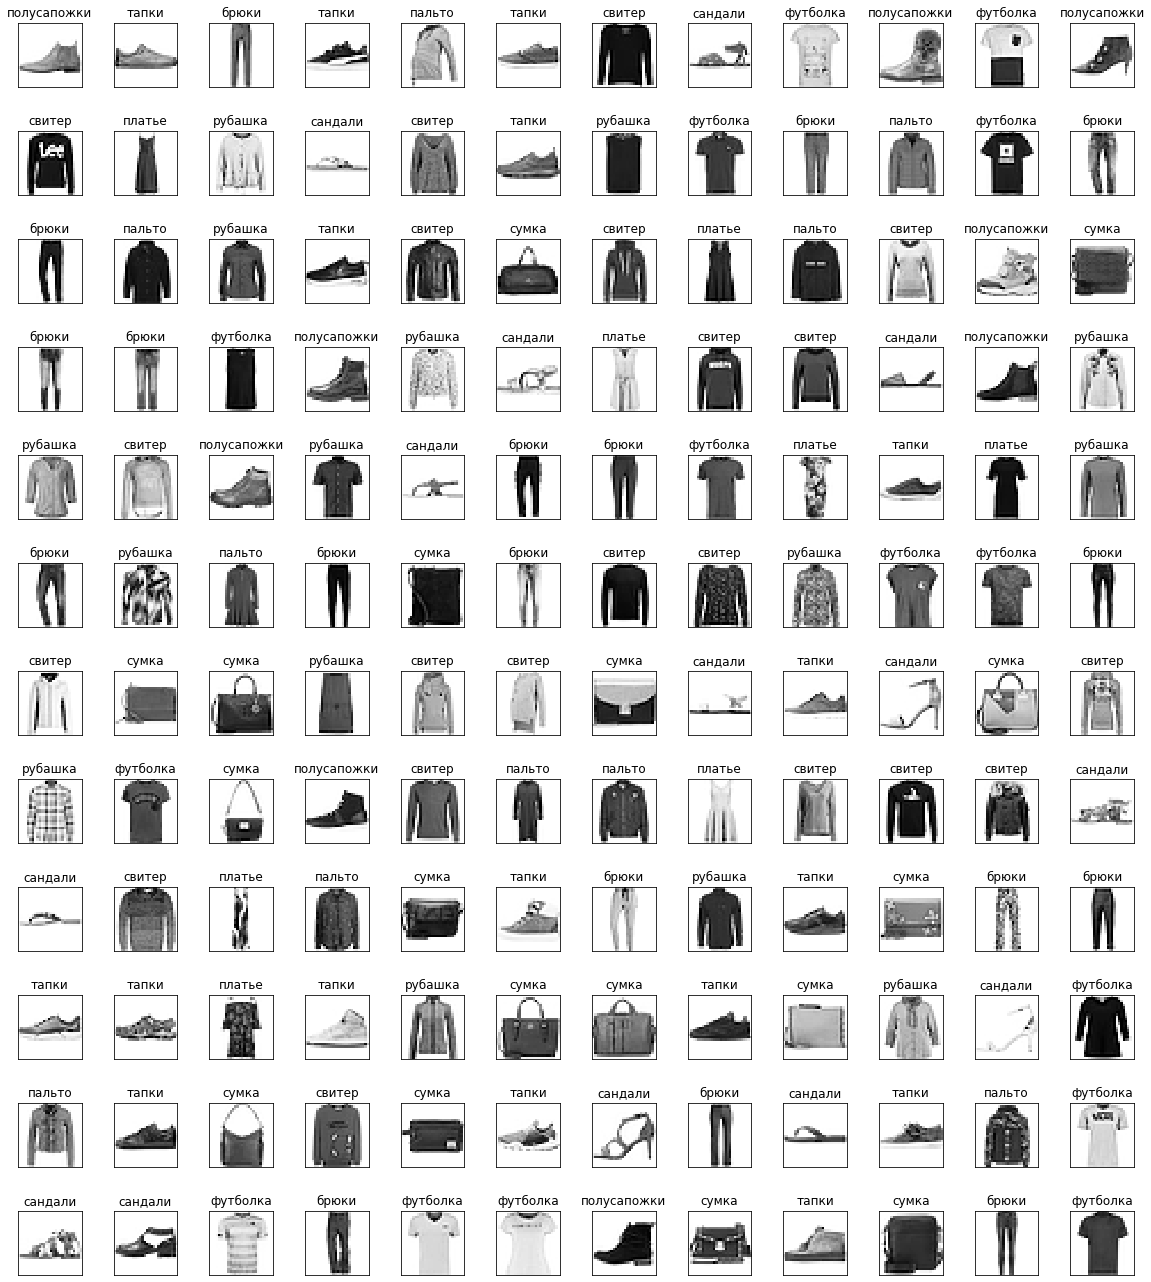

In [29]:
m=12

f, axarr = plt.subplots( m, m, figsize=(20,20))

k=0
for j in range(m):
    for i in range(m):
        k=m*j+i 
        axarr[i][j].set_title(class_names[r[k]])
        axarr[i][j].axes.get_xaxis().set_visible(False)
        axarr[i][j].axes.get_yaxis().set_visible(False)
        # axarr[i][j].imshow(test_images[k,:,:],cmap=plt.cm.plasma)
        axarr[i][j].imshow(test_images[k,:,:],cmap=plt.cm.Greys)
                        
# plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)
plt.subplots_adjust( top=1.0, hspace=0.5, wspace=0.5)
plt.show()

---

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.client import device_lib

print('tensorflow:', tf.__version__)
print('keras:', keras.__version__)

if tf.test.is_built_with_cuda():
    print('GPU devices:\n  ',
        [ [x.name, x.physical_device_desc] 
          for x in device_lib.list_local_devices() 
          if x.device_type == 'GPU' ]
    )
    print('default GPU device:', tf.test.gpu_device_name() )

else:
    print('no GPU device found')
    

tensorflow: 1.13.1
keras: 2.2.4-tf
GPU devices:
   [['/device:GPU:0', 'device: 0, name: GeForce GT 730, pci bus id: 0000:01:00.0, compute capability: 3.5']]
default GPU device: /device:GPU:0
